In [6]:
%matplotlib inline
import baby
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [7]:
train_dataset = baby.VAEDataset("E:\\epq-datasets\\CelebA_aligned\\train", batch_size=128)
val_dataset = baby.VAEDataset("E:\\epq-datasets\\CelebA_aligned\\val", batch_size=128)

In [3]:
VAEModel = baby.models.BABYModelRecreate(lr=2e-3)
VAEModel.fit(train_dataset, epochs=100, VAE=True)

Epoch 1/100
[01261|01261] [================================] [00:13:18] - loss: 7135.75           


TypeError: 'NoneType' object is not iterable

In [8]:
image = next(train_dataset)

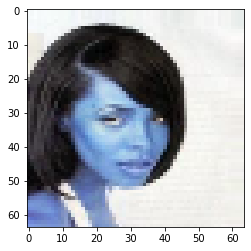

In [9]:
import cv2
image[5] = cv2.cvtColor(image[5], cv2.COLOR_BGR2RGB)
plt.imshow(image[5])

In [15]:
image2 = VAEModel.test_image(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


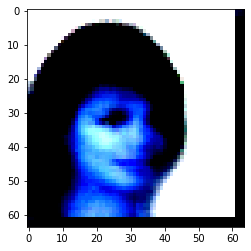

In [16]:
plt.imshow(image2[5])